In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] > 50
del df['MemberName'],df['CourseName'],df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,True
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,True


In [3]:
Y = df['Passed'].values
X = df.drop(columns = ['Passed'])

In [4]:
Y

array([False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True, False, False,  True])

In [5]:
logr = LogisticRegression(max_iter = 1000)
logr.fit(X,Y)

LogisticRegression(max_iter=1000)

In [6]:
Y_hat = logr.predict(X)
Y_hat

array([False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True])

In [7]:
Y

array([False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True, False, False,  True])

In [8]:
Y_proba = logr.predict_proba(X)
Y_proba = Y_proba[:, 1]
Y_proba

array([4.80589175e-01, 9.99999933e-01, 9.99987775e-01, 4.62638822e-04,
       9.99999477e-01, 9.99999870e-01, 2.03262640e-02, 9.96320025e-01,
       5.15265059e-02, 1.45055115e-01, 9.96288304e-01, 3.85010522e-04,
       6.77733049e-03, 9.02370261e-01, 9.81614350e-01, 5.80875204e-06,
       9.99999999e-01, 1.00592035e-04, 2.34291364e-01, 9.99999810e-01,
       9.87578820e-01, 4.88235494e-03, 1.85054594e-04, 9.99999933e-01,
       9.99999958e-01, 1.75532951e-02, 8.12357622e-03, 1.70305543e-03,
       5.03989080e-01, 6.49609447e-04, 9.99999996e-01, 5.56535515e-03,
       8.04226911e-06, 9.99926584e-01, 9.99948414e-01, 9.99750947e-01,
       3.09350898e-05, 2.28233925e-02, 9.17322427e-04, 9.99742604e-01,
       9.97214920e-01, 9.99549659e-01, 9.94924250e-01, 9.99990098e-01,
       5.33840286e-01, 9.10860123e-01, 7.23588781e-01, 7.07522341e-04,
       9.97531145e-01, 8.36693723e-04, 9.99950130e-01, 1.16584519e-02,
       7.72340270e-01, 9.99999945e-01, 9.99947502e-01, 9.99999930e-01,
      

In [9]:
def compute_confusion_matrix(Y , Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array(
        [
            [TN,FP],
            [FN,TP]
        ],
        dtype=int
    )

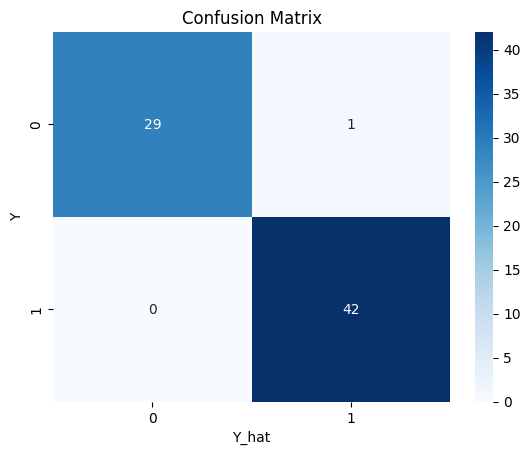

In [11]:
cm = compute_confusion_matrix(Y , Y_hat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [13]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP / (TP + FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP + FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN)/(TP + TN + FP + FN)


In [14]:
cm = compute_confusion_matrix(Y , Y_hat)
p = precision_score(cm)
r = recall_score(cm)
f1 = f1_score(cm)
acc = accuracy(cm)

print (f"Precision : {p}")
print (f"Recall : {r}")
print (f"F1 Score : {f1}")
print (f"Accuracy : {acc}")

Precision : 0.9767441860465116
Recall : 1.0
F1 Score : 0.988235294117647
Accuracy : 0.9861111111111112


In [15]:
def roc_curve(Y, Y_proba):
    thresholds = np.linspace(0, 1, 200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)

        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)

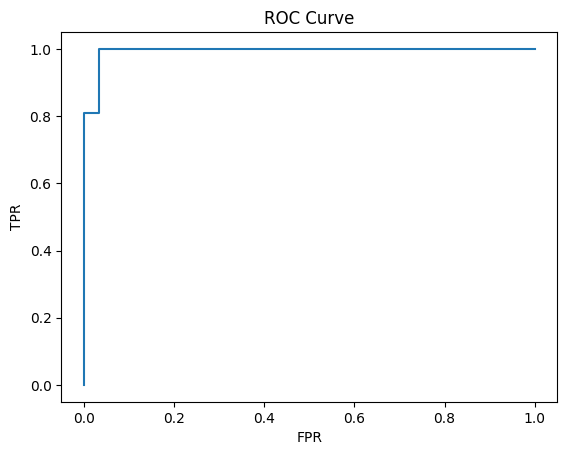

In [17]:
tpr , fpr, _ = roc_curve(Y , Y_proba)

plt.plot(fpr,tpr, label = 'LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()